In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from sklearn.gaussian_process import GaussianProcessRegressor

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

tr1 = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

In [3]:
# Remove ambient light
filters = []
for val in tr1:
    if val == stats.mode(tr1):
        filters.append(False)
    else:
        filters.append(True)
tr1 = tr1[filters]
bd1 = bd1[filters]

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__length_scale': 1.0,
 'kernel__length_scale_bounds': 'fixed',
 'kernel': RBF(length_scale=1),
 'n_restarts_optimizer': 0,
 'n_targets': None,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

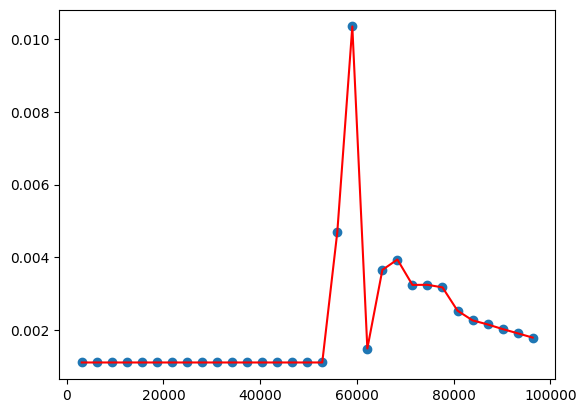

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=1.0, length_scale_bounds="fixed")
gaussian_reg = GaussianProcessRegressor(kernel=kernel).fit(bd1.reshape(-1, 1), tr1)
pred_gauss_vals = gaussian_reg.predict(bd1.reshape(-1, 1))
plt.scatter(bd1, tr1)
plt.plot(bd1, pred_gauss_vals, 'r')
gaussian_reg.get_params()

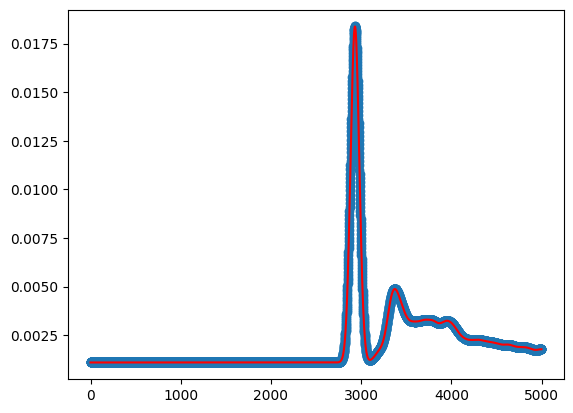

In [6]:
transients_x = np.array(range(len(transients[0, ::20])))
plt.scatter(transients_x, transients[0, ::20])

gaussian_reg.fit(transients_x.reshape(-1, 1), transients[0, ::20])
pred_true_gauss_vals = gaussian_reg.predict(transients_x.reshape(-1, 1))
plt.plot(transients_x, pred_true_gauss_vals, 'r')